In [27]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [28]:
os.environ['GROQ_API_KEY']=os.getenv("GROQ_API_KEY")

In [29]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="qwen-2.5-32b")

## Creating Tools

In [90]:
"""
def valid_email(email:str)->bool:
    '''
    Check if the email is valid or not and return True or False

    Args:
    email : str
    '''
    if len(email)>0 and email.find('@') != -1 and email.find('.') != -1:
        return True

        """

def add(a:int,b:int)->int:
    '''Add a and b
    args:
    a: first int
    b: second int    
    '''
    return a+b

In [91]:
tools = [add]
llm_with_tool = llm.bind_tools(tools)

In [32]:
from langchain_core.messages import HumanMessage,SystemMessage
from langgraph.graph import StateGraph, START, END, MessagesState
from langgraph.graph.message import add_messages
from typing_extensions import TypedDict
from typing import Annotated
from IPython.display import Image, display

In [92]:
sys_message = SystemMessage(content="You are an helpful assistant trying to help with the queries asked to the best of your abilities?")

def assistant(state:MessagesState):
    return {"messages":llm_with_tool.invoke([sys_message]+state["messages"])}

In [93]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()

In [50]:
from langgraph.prebuilt import ToolNode, tools_condition

In [94]:
builder = StateGraph(MessagesState)
builder.add_node("assistant",assistant)
builder.add_node("tools",ToolNode(tools))

builder.add_edge(START,"assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools","assistant")



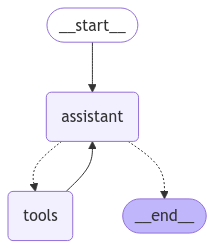

In [95]:
react_graph = builder.compile(checkpointer=memory)
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [87]:
config = {"configurable":{"thread_id":"Sree"}}
messages = HumanMessage(content="Is srk@sdfsf a valid email id?")

messages = react_graph.invoke({"messages":messages},config)

for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Is srk@sdfsf a valid email id?
================================== Ai Message ==================================

To determine if "srk@sdfsf" is a valid email address, we need to check it against the standard email format. A valid email address should contain a local part, followed by the "@" symbol, and then a domain part.

The provided email "srk@sdfsf" seems to match this structure, but the domain "sdfsf" needs to be a valid domain name, which typically includes a top-level domain (TLD) like .com, .net, etc.

For a more accurate validation, we would ideally need to perform a regex check or use a library that validates email addresses. However, I can give you a basic assessment based on the structure.

"srk@sdfsf" appears to be missing a top-level domain, which is a part of the standard email format. Therefore, it is not considered a valid email address.

If you want further validation, we would need to 

In [88]:
messages = HumanMessage(content="How about you provide me with a python code to check if email is valid or not?")

messages = react_graph.invoke({"messages":messages},config)

for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Is srk@sdfsf a valid email id?
================================== Ai Message ==================================

To determine if "srk@sdfsf" is a valid email address, we need to check it against the standard email format. A valid email address should contain a local part, followed by the "@" symbol, and then a domain part.

The provided email "srk@sdfsf" seems to match this structure, but the domain "sdfsf" needs to be a valid domain name, which typically includes a top-level domain (TLD) like .com, .net, etc.

For a more accurate validation, we would ideally need to perform a regex check or use a library that validates email addresses. However, I can give you a basic assessment based on the structure.

"srk@sdfsf" appears to be missing a top-level domain, which is a part of the standard email format. Therefore, it is not considered a valid email address.

If you want further validation, we would need to 

In [89]:
messages = HumanMessage(content="What is the sum of 12 and 13?")

messages = react_graph.invoke({"messages":messages},config)

for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Is srk@sdfsf a valid email id?
================================== Ai Message ==================================

To determine if "srk@sdfsf" is a valid email address, we need to check it against the standard email format. A valid email address should contain a local part, followed by the "@" symbol, and then a domain part.

The provided email "srk@sdfsf" seems to match this structure, but the domain "sdfsf" needs to be a valid domain name, which typically includes a top-level domain (TLD) like .com, .net, etc.

For a more accurate validation, we would ideally need to perform a regex check or use a library that validates email addresses. However, I can give you a basic assessment based on the structure.

"srk@sdfsf" appears to be missing a top-level domain, which is a part of the standard email format. Therefore, it is not considered a valid email address.

If you want further validation, we would need to 

In [96]:
messages = HumanMessage(content="What is the addition of 18 and 34?")

messages = react_graph.invoke({"messages":messages},config)

for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the addition of 18 and 34?
================================== Ai Message ==================================
Tool Calls:
  add (call_z6qb)
 Call ID: call_z6qb
  Args:
    a: 18
    b: 34
================================= Tool Message =================================
Name: add

52
================================== Ai Message ==================================

The addition of 18 and 34 is 52.


In [97]:
messages = HumanMessage(content="How do we find the average of these numbers?")

messages = react_graph.invoke({"messages":messages},config)

for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the addition of 18 and 34?
================================== Ai Message ==================================
Tool Calls:
  add (call_z6qb)
 Call ID: call_z6qb
  Args:
    a: 18
    b: 34
================================= Tool Message =================================
Name: add

52
================================== Ai Message ==================================

The addition of 18 and 34 is 52.
================================ Human Message =================================

How do we find the average of these numbers?
================================== Ai Message ==================================

To calculate the average of a set of numbers, you need to sum all the numbers together and then divide the sum by the count of numbers. Could you please provide me with the set of numbers you want to find the average of? 

Unfortunately, with the current tools I have, I can only add two numbers at a time

In [98]:
messages = HumanMessage(content="Calculate the average of these numbers")

messages = react_graph.invoke({"messages":messages},config)

for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the addition of 18 and 34?
================================== Ai Message ==================================
Tool Calls:
  add (call_z6qb)
 Call ID: call_z6qb
  Args:
    a: 18
    b: 34
================================= Tool Message =================================
Name: add

52
================================== Ai Message ==================================

The addition of 18 and 34 is 52.
================================ Human Message =================================

How do we find the average of these numbers?
================================== Ai Message ==================================

To calculate the average of a set of numbers, you need to sum all the numbers together and then divide the sum by the count of numbers. Could you please provide me with the set of numbers you want to find the average of? 

Unfortunately, with the current tools I have, I can only add two numbers at a time

In [99]:
messages = HumanMessage(content="Calculate the average of the same numbers, for which we initially did the addition")

messages = react_graph.invoke({"messages":messages},config)

for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the addition of 18 and 34?
================================== Ai Message ==================================
Tool Calls:
  add (call_z6qb)
 Call ID: call_z6qb
  Args:
    a: 18
    b: 34
================================= Tool Message =================================
Name: add

52
================================== Ai Message ==================================

The addition of 18 and 34 is 52.
================================ Human Message =================================

How do we find the average of these numbers?
================================== Ai Message ==================================

To calculate the average of a set of numbers, you need to sum all the numbers together and then divide the sum by the count of numbers. Could you please provide me with the set of numbers you want to find the average of? 

Unfortunately, with the current tools I have, I can only add two numbers at a time